In [1]:
! pip3 install nltk
! pip3 install Sastrawi
! pip install googletrans

# Import Library
# text preprocessing
import pandas as pd
import numpy as np
import csv
import requests
import io
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re # regular expression
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # stemming indonesian language
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer # to create Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer # tfid Vector 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # confussion matrix
from sklearn.preprocessing import LabelEncoder # to convert classes to number 
from sklearn.model_selection import train_test_split  # for splitting data 
from sklearn.metrics import accuracy_score # to calculate accuracy
from sklearn.pipeline import Pipeline
#from mlxtend.plotting import plot_confusion_matrix

You should consider upgrading via the 'c:\users\yusrifa deta kirana\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\yusrifa deta kirana\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


[nltk_data] Downloading package punkt to C:\Users\Yusrifa Deta
[nltk_data]     Kirana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Yusrifa Deta
[nltk_data]     Kirana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
dataset = pd.read_csv(r'before_preprocessing.csv')

In [3]:
dataset.head()

,review_id,review_text,price,packaging,product,aroma
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1


In [4]:
dataset.isnull().sum()

review_id      0
review_text    0
price          0
packaging      0
product        1
aroma          0
dtype: int64

In [5]:
dataset = dataset.fillna(method="ffill")
dataset.isnull().sum()

review_id      0
review_text    0
price          0
packaging      0
product        0
aroma          0
dtype: int64

In [6]:
dataset.head()

,review_id,review_text,price,packaging,product,aroma
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1


In [7]:
# casefolding 

def clean(dataset):
  temp_text = []

  for txt in dataset:
    # removal of @name[mention]
    txt = re.sub(r"(?:\@|https?\://)\S+", "", txt)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    txt = re.sub(r"http\S+", "", txt)

    # removal of new line
    txt = re.sub('\n', '', txt)

    # removal of RT
    txt = re.sub('RT', '', txt)

    # removal of punctuations and numbers
    txt = re.sub("[^a-zA-Z^']", " ", txt)
    txt = re.sub(" {2,}", " ", txt)

    # remove leading and trailing whitespace
    txt = txt.strip()

    # remove whitespace with a single space
    txt = re.sub(r'\s+', ' ', txt)

    # convert text to Lowercase
    text = txt.lower();
    temp_text.append(txt)
  return temp_text 

In [8]:
dataset['Clean_text'] = clean(dataset['review_text'])
dataset.head()

,review_id,review_text,price,packaging,product,aroma,Clean_text
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0,sunscreen termahal yang pernah gue beli ini ka...
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0,ini enak banget dipakainya enteng banget diwaj...
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1,the description is quite right produk ini eman...
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0,bisa untuk wajah dan badan dengan harga yang s...
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1,saya beli produk ini karena suka banget wangin...


In [9]:
 def translate(dataset):
        from googletrans import Translator
        translator = Translator()
        translate = []
        for s in dataset:
            t = translator.translate(s, src='en', dest='id').text
            translate.append(t)
        return translate

In [10]:
#TOKENISASI
def token(dataset):
  return dataset.apply(nltk.word_tokenize)


#dataset.lower_case = dataset.lower()
#print(dataset.lower_case)

# Tokenization
#dataset["clean_text"] = dataset["clean_text"].apply(nltk.word_tokenize)

# StopWords Removal
#stop_words = set(stopwords.words('indonesian'))
#dataset["review_text"] = dataset["review_text"].apply(lambda x: [item for item in x if item not in stop_words])



In [11]:
dataset['Clean_text'] = token(dataset['Clean_text'])
dataset.head()


,review_id,review_text,price,packaging,product,aroma,Clean_text
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0,"[sunscreen, termahal, yang, pernah, gue, beli,..."
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0,"[ini, enak, banget, dipakainya, enteng, banget..."
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1,"[the, description, is, quite, right, produk, i..."
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0,"[bisa, untuk, wajah, dan, badan, dengan, harga..."
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1,"[saya, beli, produk, ini, karena, suka, banget..."


In [12]:
#Stopwordremoval

def stop_words(dataset) :
  stop_words = set(stopwords.words('indonesian'))
  return dataset.apply(lambda x: [item for item in x if item not in stop_words])

dataset['Clean_text'] = stop_words(dataset['Clean_text'])
dataset.head()

,review_id,review_text,price,packaging,product,aroma,Clean_text
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0,"[sunscreen, termahal, gue, beli, kayanya, but,..."
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0,"[enak, banget, dipakainya, enteng, banget, diw..."
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1,"[the, description, is, quite, right, produk, e..."
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0,"[wajah, badan, harga, affordable, dipakai, waj..."
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1,"[beli, produk, suka, banget, wanginya, jarang,..."


In [13]:
#Stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(dataset) :
    hasil = stemmer.stem(dataset)
    return hasil


dataset['Clean_text'] = dataset['Clean_text'].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
dataset.head()

,review_id,review_text,price,packaging,product,aroma,Clean_text
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0,sunscreen termahal gue beli kayanya but it 's ...
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0,enak banget dipakainya enteng banget diwajah l...
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1,the description is quite right produk emang co...
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0,wajah badan harga affordable dipakai wajah oks...
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1,beli produk suka banget wanginya jarang suka p...


In [14]:
dataset['Clean_text'] = dataset.apply(lambda row : stem(row['Clean_text']), axis = 1)

In [15]:
dataset.head()

,review_id,review_text,price,packaging,product,aroma,Clean_text
0,708,sunscreen termahal yang pernah gue beli ini ka...,-1,0,1.0,0,sunscreen mahal gue beli kaya but it s worth i...
1,838,"ini enak banget dipakainya, enteng banget diwa...",0,0,1.0,0,enak banget pakai enteng banget wajah lengket ...
2,1166,the description is quite right. produk ini ema...,0,0,1.0,1,the description is quite right produk emang co...
3,1374,bisa untuk wajah dan badan dengan harga yang s...,1,1,1.0,0,wajah badan harga affordable pakai wajah oksid...
4,1421,saya beli produk ini karena suka banget wangin...,-1,0,0.0,1,beli produk suka banget wangi jarang suka prod...


In [16]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

df_acronym = pd.read_csv('https://raw.githubusercontent.com/ramaprakoso/analisis-sentimen/master/kamus/acronym.txt', header=None, sep='=')
df_acronym.columns = ['Singkatan', 'kepanjangan']
df_acronym.kepanjangan = df_acronym.kepanjangan.apply(lambda x: x.strip().lower())
df_acronym.Singkatan = df_acronym.Singkatan.apply(lambda x: x.strip().lower())
dict_singkatan = pd.Series(df_acronym.kepanjangan.values,index=df_acronym.Singkatan).to_dict()

dict_clean = {**dict_singkatan, **dict_slang}

In [17]:
def preprocessing_slang_singkatan(review_text, dict_clean=dict_clean):
  regex = r"\b(?:"+"|".join(re.escape(word) for word in dict_clean) + r")\b"
  reobj = re.compile(regex, re.I)
  
  return reobj.sub(lambda x:dict_clean[x.group(0)], review_text)

In [18]:
def clean_all(x, dict_clean=dict_clean):
  x = preprocessing_slang_singkatan(x, dict_clean=dict_clean)
  return x

In [19]:
tqdm.pandas()

In [20]:
dataset['Clean_text'] = dataset.Clean_text.progress_apply(lambda x: clean_all(x, dict_clean=dict_clean))

100%|██████████| 3960/3960 [00:34<00:00, 115.49it/s]


In [21]:
# Select Only Text Column
data1 = dataset[['Clean_text']]
data1

,Clean_text
0,sunscreen mahal saya beli kaya bentuk usaha te...
1,enak banget pakai enteng banget wajah lengket ...
2,the description is quite right produk emang co...
3,wajah badan harga affordable pakai wajah oksid...
4,beli produk suka banget wangi jarang suka prod...
5,kemas oke lotion citra versi universitas kedir...
6,analisis dampak lingkungan kalau rumah tekstur...
7,kali pakai kulit enak banget sudah gitu nggak ...
8,my holygrail suncreen spf tekstur watery moist...
9,tinted sunscreen worth it banget cocok warna t...


In [22]:
# Select Only Label Price
data2 = dataset[['price']]
data2

,price
0,-1
1,0
2,0
3,1
4,-1
5,0
6,0
7,-1
8,1
9,1


In [23]:
# Select Only Label Packaging
data3 = dataset[['packaging']]
data3

,packaging
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,0
8,0
9,0


In [24]:
# Select Only Label product
data4 = dataset[['product']]
data4

,product
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [25]:
# Select Only Label Aroma
data5 = dataset[['aroma']]
data5

,aroma
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,0
9,0


In [26]:
#menjadikan satu label yang ada menjadi 1 variabel
label = pd.concat([data2, data3, data4, data5], axis=1)
label

,price,packaging,product,aroma
0,-1,0,1.0,0
1,0,0,1.0,0
2,0,0,1.0,1
3,1,1,1.0,0
4,-1,0,0.0,1
5,0,1,1.0,1
6,0,0,1.0,0
7,-1,0,1.0,0
8,1,0,1.0,0
9,1,0,1.0,0


In [27]:
# save data to csv
data1.to_csv('Clean_text.csv', index=False)

In [28]:
label.to_csv('Label.csv', index=False)

In [29]:
dataset["price"].value_counts()

 0    2187
 1    1057
-1     716
Name: price, dtype: int64

In [30]:
dataset["packaging"].value_counts()

 0    3324
 1     447
-1     189
Name: packaging, dtype: int64

In [31]:
dataset["product"].value_counts()

 1.0    2612
-1.0     688
 0.0     660
Name: product, dtype: int64

In [32]:
dataset["aroma"].value_counts()

 0    3073
 1     669
-1     218
Name: aroma, dtype: int64

In [33]:
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer, CountVectorizer
tfidf_transformer = TfidfTransformer()
tfidf_vectorizer = TfidfVectorizer()
count_vectorize = CountVectorizer()

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = TfidfVectorizer()

# contoh
a = vectorizer.fit_transform(corpus)
a.toarray()

array([[0.        , 0.49248889, 0.        , 0.40264194, 0.77157901,
        0.        ],
       [0.77157901, 0.49248889, 0.        , 0.40264194, 0.        ,
        0.        ],
       [0.        , 0.49248889, 0.        , 0.40264194, 0.        ,
        0.77157901],
       [0.        , 0.        , 0.88654763, 0.46263733, 0.        ,
        0.        ]])

In [35]:
a = dataset['Clean_text']
# Count TF_IDF Vectorizer
count_vectorizer = CountVectorizer()
count_vector = count_vectorizer.fit_transform(dataset['Clean_text'])
count_vector.shape

(3960, 8588)

In [36]:
a = dataset['Clean_text']
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer = tfidf_vectorizer.fit_transform(a)
print(tfidf_vectorizer)


  (0, 7516)	0.2426534938526257
  (0, 4425)	0.09287693083256633
  (0, 6745)	0.25058733710451886
  (0, 723)	0.07772997152858191
  (0, 3643)	0.12317447081802656
  (0, 761)	0.11332515113690449
  (0, 8194)	0.10371377267789426
  (0, 7809)	0.12947398542523325
  (0, 3360)	0.20155729699374345
  (0, 7227)	0.1355719517148687
  (0, 8467)	0.12947398542523325
  (0, 7118)	0.07807736284086875
  (0, 305)	0.11531360176909397
  (0, 8421)	0.14822494818281082
  (0, 1722)	0.1576054134023332
  (0, 1159)	0.17102937288263842
  (0, 131)	0.18966319337752954
  (0, 7472)	0.07047970458858505
  (0, 7510)	0.211478845660333
  (0, 3037)	0.19792067133543242
  (0, 7328)	0.12174361836327363
  (0, 7870)	0.1772926275041677
  (0, 7891)	0.1360090883720058
  (0, 8401)	0.14573070628999846
  (0, 1223)	0.1584920448042104
  :	:
  (3959, 7019)	0.08557996938285017
  (3959, 4701)	0.1435261862600506
  (3959, 1403)	0.0791127420371088
  (3959, 526)	0.07588226637713823
  (3959, 5355)	0.1250295807605629
  (3959, 3066)	0.17087011901783317


In [37]:
tfidf_vectorizer.shape

(3960, 8588)

In [38]:
#tfidf = TfidfVectorizer(sublinear_tf=True, 
 #                       min_df=5, 
  #                      norm = 'l2', 
   #                     encoding='latin-1', 
    #                    ngram_range=(1, 10))

In [39]:
# Encode Target
#encoder = LabelEncoder()
#label = encoder.fit_transform(dataset['Label'])
#label

In [40]:
#a = dataset['Clean_text']
#tfidf_vectorizer = TfidfVectorizer()
#tfid_vector = tfidf_vectorizer.fit_transform(dataset['Clean_text'])
#tfid_vector.shape

In [41]:
#dataset.tail()

In [42]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(dataset.Clean_text)
words_dataset = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names())
words_dataset.head()

,acid,acne,acnes,active,ada,adat,adem,administrasi,aduh,advanced,...,worth,would,wow,yaa,yah,yang,yes,you,your,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.15544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
#count_vec = CountVectorizer()
#a = count_vec.fit_transform(dataset['Clean_text'])
#print(a)

In [44]:
#a = dataset['Clean_text']
#tfidf_transformer = TfidfTransformer()
#a = tfidf_transformer.fit_transform(a)
#print(a)

In [45]:
#seleksi fitur
import numpy as np
from scipy import stats
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor,RegressorChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multioutput import ClassifierChain
from sklearn import datasets
from sklearn.feature_selection import SelectKBest,chi2 , f_regression, SelectFromModel, SelectPercentile
from sklearn.preprocessing import LabelBinarizer
from sklearn.datasets import load_iris
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MultiLabelBinarizer

In [46]:
#x = tfidf_vectorizer

In [47]:
#y = dataset[['price','packaging','product','aroma']]

In [48]:
x = tfidf_vectorizer.copy()

In [49]:
y = np.array(dataset[['price','packaging','product','aroma']])

In [50]:
print(y)

[[-1.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  1.]
 ...
 [ 0.  0. -1. -1.]
 [ 0.  0.  1.  0.]
 [ 0.  0. -1.  0.]]


In [51]:
x.shape, y.shape

((3960, 8588), (3960, 4))

In [52]:
#clf = Pipeline([('chi2', SelectKBest(chi2, k=100)),('knn', KNeighborsClassifier())])
#multi_clf = OneVsRestClassifier(clf)

In [53]:
Y = MultiLabelBinarizer().fit_transform(y)

In [54]:
Y.shape

(3960, 3)

In [55]:
x_new = SelectKBest(chi2, k=100).fit_transform(x, Y)

In [56]:
print(x_new)

  (0, 99)	0.12947398542523325
  (0, 6)	0.07772997152858191
  (0, 79)	0.25058733710451886
  (0, 52)	0.09287693083256633
  (1, 39)	0.15301698758890597
  (1, 61)	0.11705666992947558
  (1, 24)	0.14940231924761802
  (2, 83)	0.08564039944838277
  (2, 20)	0.05867045274014769
  (3, 59)	0.25283245304868257
  (3, 97)	0.10914085643741224
  (3, 1)	0.1620288601220661
  (3, 32)	0.07349735722142406
  (4, 57)	0.34656770181398705
  (4, 96)	0.1673014203761515
  (4, 32)	0.06120499098572512
  (4, 6)	0.1471030333542037
  (4, 52)	0.08788423554918758
  (5, 68)	0.07132354929290143
  (5, 94)	0.07812835793243611
  (5, 96)	0.13290457545167308
  (5, 97)	0.14440185508586348
  (5, 83)	0.05778734034896776
  (5, 39)	0.044595884469653554
  (5, 24)	0.043542411033244854
  :	:
  (3955, 61)	0.0709507564471408
  (3955, 6)	0.08101145066937455
  (3956, 82)	0.23135416436164297
  (3956, 36)	0.21892843632012737
  (3956, 93)	0.13599491316512652
  (3956, 0)	0.13612488277456347
  (3956, 12)	0.13612488277456347
  (3956, 32)	0.07732

In [57]:
x_new.shape

(3960, 100)

In [58]:
Kbest = SelectKBest(score_func = chi2, k=100).fit(x, Y)

In [59]:
#KBest = SelectKBest(score_func = chi2, k = 500)
#KBest = KBest.fit(x, Y)

In [123]:
skor_chi = pd.DataFrame({'features': x_new, 'Chi2Score': Kbest.scores_, 'pValue':Kbest.pvalues_ })
skor_chi

,features,Chi2Score,pValue
0,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.093003,0.954563
1,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.276200,0.871012
2,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.099584,0.951427
3,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.316703,0.853550
4,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.101870,0.950341
5,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.145053,0.930041
6,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.276128,0.871043
7,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.058572,0.971139
8,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.154617,0.925604
9,"(0, 99)\t0.12947398542523325\n (0, 6)\t0.07...",0.110576,0.946213


In [124]:
skor_chi.shape

(8588, 3)

In [125]:
#selected_features = []
#for i in multi_clf.estimator:
 #   selected_features += list([i.transform["chi2"].get_support ([indices] = True)

In [126]:
#selected_features = [] 
#for label in dataset:
 #   selector = SelectKBest(chi2, k=1000)
  #  selector.fit(x, y[[price]])
   # selected_features.append(list(selector.scores_))

# MeanCS 
#selected_features = np.mean(selected_features, axis=0) > threshold
# MaxCS
#selected_features = np.max(selected_features, axis=0) > threshold

In [127]:
#text_crosstab = pd.crosstab(dataset['Clean_text'], dataset['label'], 
#                                     margins=True)
#text_crosstab

In [128]:
#X = dataset[["a",	"label"]]

In [129]:
#y = dataset[["price"]]

In [67]:
#X_new = SelectKBest(chi2, k=3).fit_transform(X, y)

In [68]:
# Model input Sequences
#pre_train= Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer())])

In [69]:
from sklearn.model_selection import train_test_split
x_new_train, x_new_test, Y_train, Y_test = train_test_split(x_new,Y, test_size=0.3, random_state=0)

In [70]:
#print ("Jumlah Data Latih :",len (x_train))
#print ("Jumlah Data Uji :",len (x_test))

In [105]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


knn = KNeighborsClassifier(n_neighbors=10)
## Fit the model on the training data.
classifier = MultiOutputClassifier(knn, n_jobs=-1)
classifier.fit(x_new_train, Y_train)
## See how the model performs on the test data.
predictions = classifier.predict(x_new_test)

In [106]:
knn_skor=classifier.score(x_new_test,np.array(Y_test))
print(knn_skor * 100 ,'%')

64.3097643097643 %


In [107]:
classifier.fit(x_new_test,np.array(Y_test) )

MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=10, p=2,
                                                     weights='uniform'),
                      n_jobs=-1)

In [122]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn.metrics import  multilabel_confusion_matrix

multilabel = multilabel_confusion_matrix(Y_test,predictions)
f1_score = metrics.f1_score(Y_test,predictions, average='micro', labels=np.unique(predictions))
precision_score = metrics.precision_score(Y_test,predictions, average='micro', labels=np.unique(predictions))
recall_score = metrics.recall_score(Y_test,predictions, average='micro', labels=np.unique(predictions))
        
print('akurasi f1 score        :', f1_score* 100 ,'%')
print('akurasi precision score :', precision_score* 100 ,'%')
print('akurasi recall score    :', recall_score* 100 ,'%')

akurasi f1 score        : 87.97091870456049 %
akurasi precision score : 97.15328467153284 %
akurasi recall score    : 80.3743961352657 %


In [104]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

Y_train_large = (Y_train.astype(int) >= 0)
Y_train_odd = (Y_train.astype(int) % 2 == 1)
Y_multilabel = np.c_[Y_train_large, Y_train_odd]

knn_clf = KNeighborsClassifier(n_neighbors=25)
knn_clf = MultiOutputClassifier(knn_clf, n_jobs=-1)
knn_clf.fit(x_new_train, Y_multilabel)

MultiOutputClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None,
                                                     n_neighbors=25, p=2,
                                                     weights='uniform'),
                      n_jobs=-1)

In [76]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

Y_train_knn_pred = cross_val_predict(classifier,x_new_train, Y_multilabel, cv=5)
hasila = f1_score(Y_multilabel, Y_train_knn_pred, average="macro")
print('akurasi f1 score :', hasila * 100 ,'%')

akurasi f1 score : 89.06142263444221 %


In [77]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import  multilabel_confusion_matrix
                  
multilabel_confusion_matrix(Y_test, predictions)
print(metrics.multilabel_confusion_matrix(Y_test, predictions))

[[[ 681   21]
  [ 327  159]]

 [[   0   18]
  [   0 1170]]

 [[   1  217]
  [   1  969]]]


In [78]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
rmse_val = [] #to store rmse values for different k
for K in range(5):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_new_train, Y_train)  #fit the model
    pred=model.predict(x_new_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.4267303193260338
RMSE value for k=  2 is: 0.382431966177265
RMSE value for k=  3 is: 0.36383116119238074
RMSE value for k=  4 is: 0.35352858940138093
RMSE value for k=  5 is: 0.3484775288354391


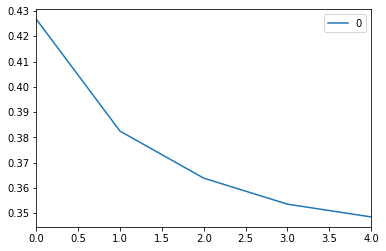

In [95]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [81]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(x_new_train,Y_train)
dt_knn=model.predict(x_new_test)
scaled_features = pd.DataFrame(x_new)
target_feature = dataset["Clean_text"]
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts= 
result_knn=cross_val_score(model,scaled_features,target_feature,cv=kfold,scoring='accuracy')
print('The overall score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,scaled_features,target_feature,cv=10)
sns.heatmap(confusion_matrix(dt_knn,y_test),annot=True,cmap='summer')
plt.title('KNN Confusion_matrix')

C:\Users\Yusrifa Deta Kirana\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: setting an array element with a sequence.

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

y_true = np.array(dataset[['price','packaging','product','aroma']])
y_pred = np.array(dataset[['aroma','packaging','product','price',]])

In [ ]:
multilabel_confusion_matrix(Y_test,predictions, price=[0, 1, 0,-1])

In [ ]:
#test_data = ['kulit yang oily dehydrated plus sensitive prod']
#classifier.predict(vectorizer.transform())

In [ ]:
#from sklearn.metrics import multilabel_confusion_matrix

class Report:
    def __init__(self, x_new_test, Y_test):
        self.x_new = x_new_test
        self.Y = Y_test
    
    def metrics(self, model):
        Y_pred = model.predict(self.x_new)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.Y, Y_pred) * 100 ,'%')
        
        print('\nConfusion Matrix:\n')
        print( multilabel_confusion_matrix(self.Y, Y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.Y, Y_pred))

In [ ]:
report = Report(x_new_test, np.array(Y_test))

In [ ]:
#KNN Model
knn = KNeighborsClassifier().fit(x_new_train,y_train)
report.metrics(knn)

In [ ]:
#classifier = MultiOutputClassifier(knn, n_jobs=-1)
#classifier = multilabel_confusion_matrix(Y_train, Y_test)
#multilabel_confusion_matrix(Y_true, Y_pred)
#report.metrics(knn)

In [ ]:
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x, y = make_classification(random_state=0)
x_train, x_test, y_train, y_test = train_test_split(
                 x, y, random_state=0)
clf = knn(random_state=0)
clf.fit(x_train, y_train)
knn(random_state=0)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show() 

In [114]:
# melakukan kfold cross validationn
score = cross_val_score(knn, x_new_train, Y_train, cv=20)
print(score * 100 )
print('Mean Score Validation : ',score.mean() * 100 , '%')
print('STD Score Validation : ',score.std()  * 100 , '%')

[64.74820144 66.18705036 74.82014388 74.82014388 70.50359712 60.43165468
 63.30935252 69.0647482  64.74820144 69.0647482  62.58992806 58.99280576
 55.79710145 65.2173913  69.56521739 70.28985507 68.11594203 66.66666667
 68.11594203 60.86956522]
Mean Score Validation :  66.19591283494944 %
STD Score Validation :  4.83518285974029 %


In [ ]:
# Kita gunakan metric yang umum
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,predictions )
# 72% not bad ....

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))